In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

##### Load dataset

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

##### writing Label classes

In [4]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

##### displaying dataset

In [ ]:
num_row = 20
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(100):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i])
    ax.set_title(class_name[y_train[i][0]])
    ax.axis('off')

plt.show()

##### checking distribuation of values in dataset

In [ ]:
classes, count = np.unique(y_train, return_counts=True)

plt.barh(classes, count)
plt.title('Class distribution in training set')

In [ ]:
classes, count = np.unique(y_test, return_counts=True)

plt.barh(classes, count)
plt.title('Class distribution in training set')

##### Limiting value between 0 and 1

In [5]:
X_train = X_train / 255
X_test = X_test / 255

##### Training Model

In [6]:
tf.keras.backend.clear_session

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history =  model.fit(X_train, y_train, epochs=50, batch_size=128,
          validation_split=0.2)

##### Testing Model 

In [7]:
load_model = tf.keras.models.load_model('cifar_10.h5')

In [8]:
load_model.evaluate(X_test, y_test)

313/313 [==============================] - 20s 62ms/step - loss: 0.5555 - accuracy: 0.8387


[0.5554761290550232, 0.838699996471405]

In [ ]:
plt.plot(history.history['loss'], c='b')
plt.plot(history.history['val_loss'], c='r')

In [ ]:
plt.plot(history.history['accuracy'], c='b')
plt.plot(history.history['val_accuracy'], c='r')

In [16]:
y_pred = load_model.predict(X_test)
y_prob = y_pred.argmax(axis=1)
y_prob

313/313 [==============================] - 20s 62ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

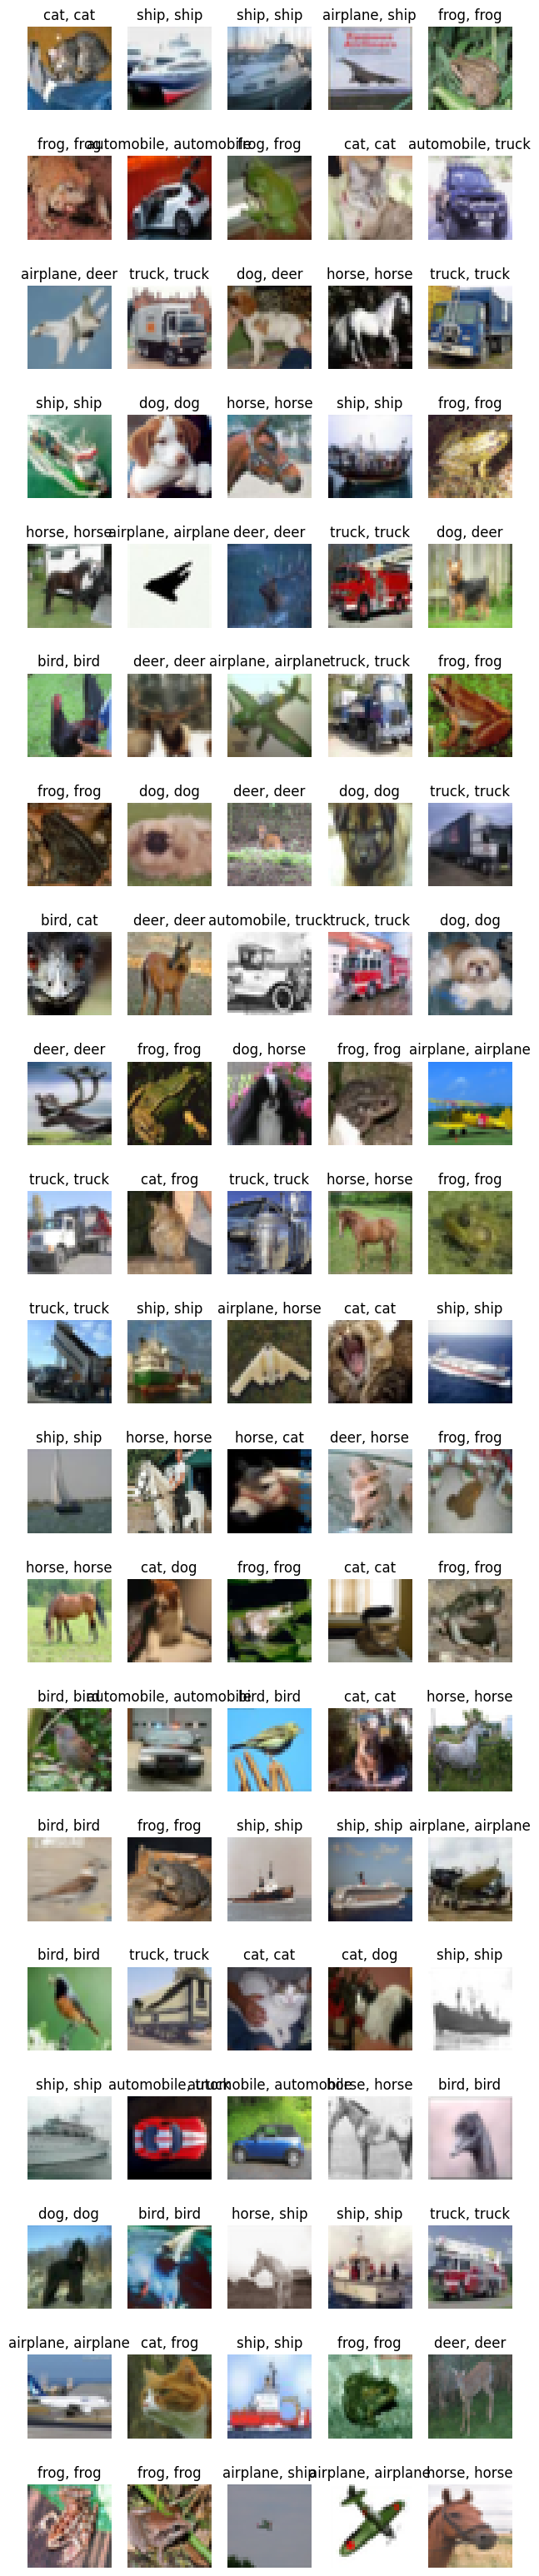

In [17]:
num_row = 20
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col,3*num_row))
for i in range(100):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_test[i])
    ax.set_title(f'{class_name[y_test[i][0]]}, {class_name[y_prob[i]]}')
    ax.axis('off')

plt.show()

In [11]:
print(classification_report(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.09      0.05      0.06      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.12      0.12      0.12      1000
           6       0.00      0.00      0.00      1000
           7       0.12      0.09      0.10      1000
           8       0.10      0.77      0.18      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.04      0.10      0.05     10000
weighted avg       0.04      0.10      0.05     10000



e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


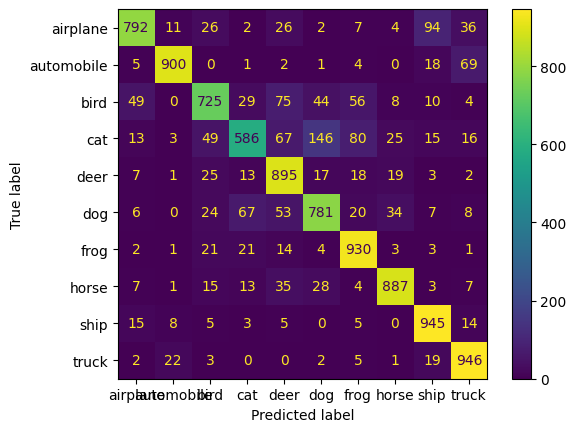

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prob,
                                        display_labels=class_name)
plt.show()